In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
#Data Collection and Processing, loading the data into the Pandas Dataframe
dataset = pd.read_csv('gld_price_data.csv')

In [3]:
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
dataset.sample(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
2018,2/21/2017,2365.379883,117.750000,11.540000,17.030001,1.060940
253,3/9/2009,676.530029,90.570000,28.650000,12.770000,1.262276
649,12/23/2010,1256.770020,134.660004,38.980000,28.610001,1.311544
1984,12/30/2016,2238.830078,109.610001,11.720000,15.110000,1.057530
1873,6/28/2016,2036.089966,125.320000,11.470000,16.910000,1.107395
736,5/5/2011,1335.099976,143.470001,39.320000,33.720001,1.454440
1443,7/24/2014,1987.979980,124.349998,37.820000,19.580000,1.346475
657,1/5/2011,1276.560059,134.369995,38.520000,28.610001,1.332108
1357,3/3/2014,1845.729980,130.289993,37.520000,20.620001,1.377695
1134,2/27/2013,1515.989990,154.570007,33.400002,28.010000,1.306592


In [5]:
#getting the number of rows and columns in the dataset
dataset.shape

(2290, 6)

In [6]:
#getting the info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
#Checking if there are any missing values
dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
#Checking for correlation

In [9]:
correlation = dataset.corr()

C:\Users\DELL INSPIRON 15\AppData\Local\Temp\ipykernel_452\3698212406.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()


In [10]:
#Constructing a heatmap to understand the correlation

<Axes: >

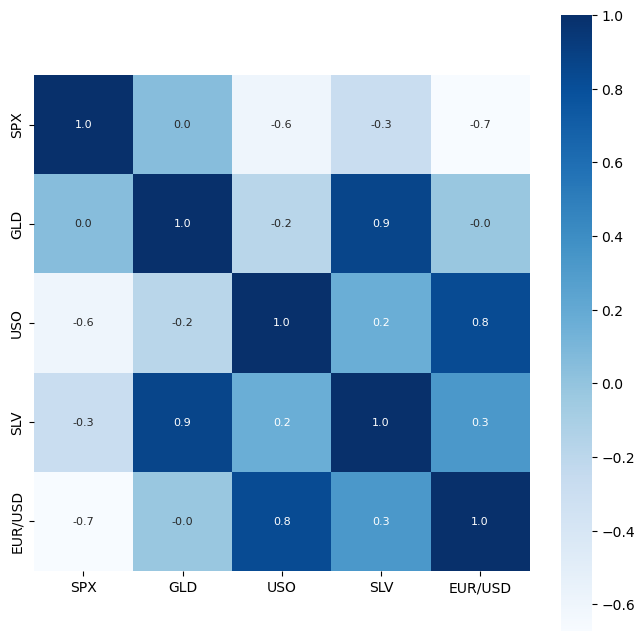

In [14]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square = True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [15]:
#correlation value of gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\DELL INSPIRON 15\AppData\Local\Temp\ipykernel_452\1619515810.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['GLD'], color = 'green')


<Axes: xlabel='GLD', ylabel='Density'>

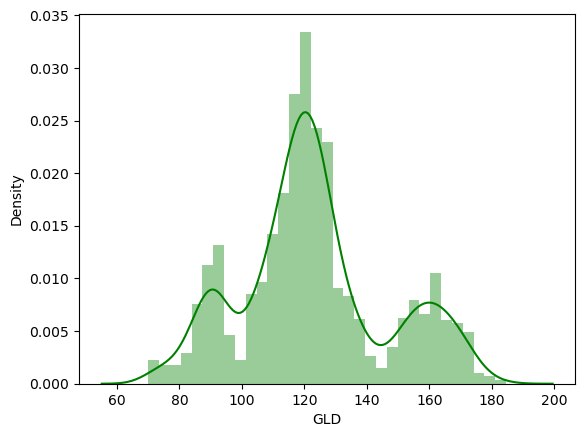

In [16]:
#Checking the distribution of the Gold price
sns.distplot(dataset['GLD'], color = 'green')

In [17]:
#Splitting the Features and Targets

In [18]:
X = dataset.drop(['Date', 'GLD'], axis = 1)
y = dataset['GLD']

In [19]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [20]:
#Spliting into training and Test Data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [22]:
#Model Training

In [23]:
regressor = RandomForestRegressor()

In [24]:
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
#Model Evaluation, prediction on Test Data

In [27]:
test_data_pred = regressor.predict(X_test)

In [28]:
print(test_data_pred)

[168.52549942  81.89699968 116.26869965 127.72620107 120.58390122
 154.6065982  150.63209892 126.05480038 117.37489879 126.09240048
 116.66690117 171.44750062 141.40849797 167.59169882 115.2111002
 117.70370051 138.79930329 170.56290151 159.12510203 159.93690087
 154.94659962 125.20080003 176.20710018 157.11530396 125.21330018
  93.79179976  77.61710014 120.93270027 119.09429953 167.58519983
  88.27600055 125.37529998  90.97560077 117.71120014 121.14969911
 136.47380083 115.6602009  115.32810065 148.25       107.21440132
 104.27150232  87.21239777 126.6020009  117.69619969 152.34309879
 119.44840035 108.42819953 108.04829825  93.26470054 127.18499765
  74.64890006 113.66379925 121.28660007 111.21039876 118.97119915
 120.83499949 160.19699857 168.62460173 146.91549668  85.80749879
  94.21950037  86.74139887  90.52760009 118.97110077 126.41780045
 127.58689972 169.17719981 122.22479935 117.35529892  98.867501
 168.56620091 143.07329778 132.23710179 121.16970221 120.78179934
 119.39590079

In [30]:
#Using r_square value
error_score = metrics.r2_score(y_test, test_data_pred)
print('R squared error:', error_score)

R squared error: 0.9891882305573781


In [31]:
#Compare the actual values and the predicted values in a plot
y_test = list(y_test)

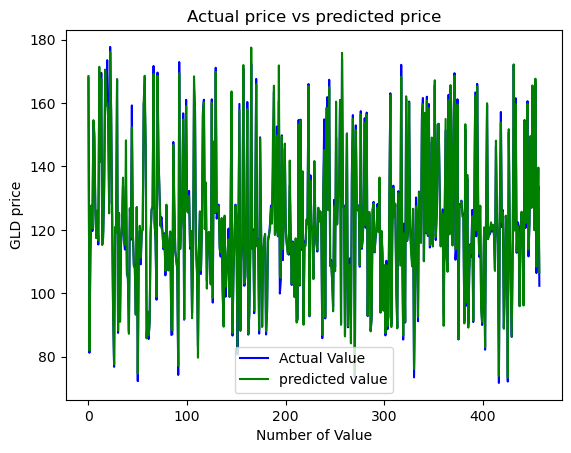

In [32]:
plt.plot(y_test, color = 'blue', label = 'Actual Value')
plt.plot(test_data_pred, color='green', label = 'predicted value')
plt.title('Actual price vs predicted price')
plt.xlabel('Number of Value')
plt.ylabel('GLD price')
plt.legend()
plt.show()